In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fp = r"UKR_data_sources/GEONAMES_UKR/UA/UA.txt"

data = pd.read_csv(fp, sep='\t', header=None, dtype={11 : "object"})

In [3]:
data.head()
data.dtypes

0       int64
1      object
2      object
3      object
4     float64
5     float64
6      object
7      object
8      object
9      object
10    float64
11     object
12    float64
13    float64
14      int64
15    float64
16      int64
17     object
18     object
dtype: object

In [4]:
column_names = {0 : "geonameid ", 1 : "name", 2 : "asciiname", 3 : "alternatenames", 4 : "latitude",
                5 : "longitude", 6 : "feature_class", 7 : "feature_code", 8 : "country_code", 
                9 : "cc2", 10 : "admin1_code", 11 : "admin2_code", 12 : "admin3_code", 13 : "admin4_code", 
                14 : "population", 15 : "elevation", 16 : "dem", 17 : "timezone", 18 : "modification_date"}

data = data.rename(columns=column_names)

In [5]:
data.head()

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature_class,feature_code,country_code,cc2,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,dem,timezone,modification_date
0,461695,Krasnopartyzanska,Krasnopartyzanska,"Krasnopartizans'ka,Krasnopartizanskaja,Stancij...",45.40145,34.21635,S,RSTN,UA,NaN,11.0,NaN,NaN,NaN,0,NaN,59,Europe/Simferopol,2020-09-16
1,461697,Malyy Kuyalnik,Malyy Kuyalnik,"Malij Kujal'nik,Malyi Kouialnyk,Malyy Kuyal'ni...",46.87082,30.45676,H,STM,UA,NaN,17.0,NaN,NaN,NaN,0,NaN,0,Europe/Kiev,2020-03-18
2,461727,Olenevka,Olenevka,"Karadzhi,Olenevka,Qaragy,Qarağy,Караджи́,Оленевка",45.38333,32.53333,P,PPLA3,UA,NaN,11.0,710690,11153142.0,NaN,1441,5.0,-3,Europe/Simferopol,2017-03-29
3,461734,Ozero Alibei,Ozero Alibei,"Lacul Alibei,Lake Alibei,Ozero Alibei,Ozero Al...",45.79739,30.00827,H,LK,UA,NaN,17.0,NaN,NaN,NaN,0,NaN,0,Europe/Simferopol,2021-05-06
4,467852,Yelyzavetyns'kyy,Yelyzavetyns'kyy,"Elizavetins'kij,Elizavetinskij,Yelizavetinskiy...",47.84083,38.82056,P,PPLX,UA,NaN,5.0,713502,NaN,NaN,0,NaN,71,Europe/Kiev,2021-07-27


In [6]:
selection = data.loc[data["feature_class"] == "P"]
selection.columns.values

# selection["admin1_code"].astype(int)

array(['geonameid ', 'name', 'asciiname', 'alternatenames', 'latitude',
       'longitude', 'feature_class', 'feature_code', 'country_code',
       'cc2', 'admin1_code', 'admin2_code', 'admin3_code', 'admin4_code',
       'population', 'elevation', 'dem', 'timezone', 'modification_date'],
      dtype=object)

In [7]:
selection = selection[['geonameid ', 'name', 'asciiname', 'alternatenames', 'latitude',
       'longitude', 'feature_class', 'feature_code', 'country_code',
       'cc2','population', 'elevation', 'dem', 'timezone', 'modification_date']]

print(f"the dataset contains {len(selection)} records")

print(selection.head())

the dataset contains 33162 records
    geonameid               name         asciiname  \
2       461727          Olenevka          Olenevka   
4       467852  Yelyzavetyns'kyy  Yelyzavetyns'kyy   
5       468196       Katerynivka       Katerynivka   
8       477085       Vaniushkyne       Vaniushkyne   
10      485524          Svistuny          Svistuny   

                                       alternatenames  latitude  longitude  \
2   Karadzhi,Olenevka,Qaragy,Qarağy,Караджи́,Оленевка  45.38333   32.53333   
4   Elizavetins'kij,Elizavetinskij,Yelizavetinskiy...  47.84083   38.82056   
5   Katerinivka,Katerinovka,Katerynivka,Kateryniwk...  47.69011   38.75174   
8   Vaniushkyne,Vanjushkine,Vanyushkin,Vanyushkyne...  47.25507   38.27055   
10                                                NaN  47.72639   38.40694   

   feature_class feature_code country_code  cc2  population  elevation  dem  \
2              P        PPLA3           UA  NaN        1441        5.0   -3   
4            

In [8]:
geonames_places = gpd.GeoDataFrame(selection, geometry=gpd.points_from_xy(selection.longitude, selection.latitude))

In [9]:
geonames_places.head()

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature_class,feature_code,country_code,cc2,population,elevation,dem,timezone,modification_date,geometry
2,461727,Olenevka,Olenevka,"Karadzhi,Olenevka,Qaragy,Qarağy,Караджи́,Оленевка",45.38333,32.53333,P,PPLA3,UA,NaN,1441,5.0,-3,Europe/Simferopol,2017-03-29,POINT (32.53333 45.38333)
4,467852,Yelyzavetyns'kyy,Yelyzavetyns'kyy,"Elizavetins'kij,Elizavetinskij,Yelizavetinskiy...",47.84083,38.82056,P,PPLX,UA,NaN,0,NaN,71,Europe/Kiev,2021-07-27,POINT (38.82056 47.84083)
5,468196,Katerynivka,Katerynivka,"Katerinivka,Katerinovka,Katerynivka,Kateryniwk...",47.69011,38.75174,P,PPL,UA,NaN,0,NaN,20,Europe/Kiev,2020-09-09,POINT (38.75174 47.69011)
8,477085,Vaniushkyne,Vaniushkyne,"Vaniushkyne,Vanjushkine,Vanyushkin,Vanyushkyne...",47.25507,38.27055,P,PPL,UA,NaN,0,NaN,62,Europe/Kiev,2021-05-06,POINT (38.27055 47.25507)
10,485524,Svistuny,Svistuny,NaN,47.72639,38.40694,P,PPL,UA,NaN,0,NaN,98,Europe/Kiev,2016-01-07,POINT (38.40694 47.72639)


<AxesSubplot:>

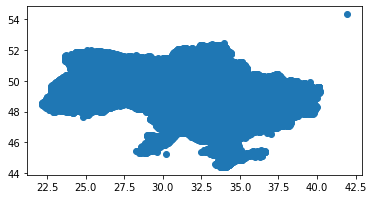

In [10]:
geonames_places.plot()